Within this notebook we will look at an example Regression problem. We will try to predict "nihtbx_picvocab_agecorrected" scores.

# Init Phase

In [1]:
import ABCD_ML

In [2]:
# This is the 2.0.1 release dr, we'll load data from it
nda_dr1 = '/mnt/sdb2/ABCDFixRelease2p0p1/'

# This is the 2.0 release dr, we'll load targets from it
nda_dr2 = '/mnt/sdb2/ABCD2p0NDA/'

# We will use the gordon ROI resting state fMRI correlations as our data
data_loc = nda_dr1 + 'abcd_betnet02.txt'

# This file contains the NIH toolbox scores
target_loc = nda_dr2 + 'abcd_tbss01.txt'

In [3]:
# A lot of these are default values, but just showing everything as an example,
# See the docs / init help string for actual explanation

ML = ABCD_ML.ABCD_ML(exp_name = 'Regression_Example',
                     log_dr = '',
                     existing_log = 'overwrite',
                     notebook = True,
                     subject_id = 'src_subject_id',
                     eventname = 'baseline_year_1_arm_1',
                     use_default_subject_ids = True,
                     default_dataset_type = 'basic',
                     default_na_values = ['777', '999'],
                     original_targets_key = 'targets',
                     low_memory_mode = False,
                     random_state = 1,
                     verbose = True
                     )

exp_name = Regression_Example
log_dr = /home/sage/ABCD_ML/Examples
existing_log = overwrite
verbose = True
exp log dr setup at: /home/sage/ABCD_ML/Examples/Regression_Example
log file at: /home/sage/ABCD_ML/Examples/Regression_Example/logs.txt
notebook = True
default subject id col = src_subject_id
eventname = baseline_year_1_arm_1
use default subject ids = True
default dataset type = basic
default NaN values = ['777', '999']
original targets key col = targets
low memory mode = False
random state = 1
ABCD_ML object initialized


# Data Loading Phase

We would start by loading exclusions, the reason for this is, if loaded before data or covars, ect... the excluded subjects will be removed when loading data, targets, ect... as loaded before any drop behavior based on values. For example, when computing different filter_outliers, or dropping columns ect... this way it will only consider the non-excluded subjects. 

We won't load any here, but if there were certain known subjects to exclude they could be read from a file as exclusions or passed in as a list to Load_Exclusions.

We will just load in the data instead, specifically we are using the resting state correlations

In [4]:
ML.Load_Data(loc = data_loc)

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_betnet02.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_betnet02_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'rsfmri_c_ngd_visitid', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type
Dropped 0 columns, per drop_keys argument
Dropped 0 cols for all missing values
Dropped 690 rows for missing values
Dropped rows with missing data
loaded shape:  (10276, 181)

The following columns have a questionable number of unique values: 
rsfmri_c_ngd_tr unique vals: 11
rsfmri_c_ngd_numtrs unique vals: 118
rsfmri_c_ngd_nvols unique vals: 105
rsfmri_c_ngd_stnvols unique vals: 1280
rsfmri_c_ngd_stcontignvols unique vals: 1364
rsfmri_c_ngd_ntpoints unique vals: 1407


Total valid overlapping subjects = 10276



Lets take a quick look at the data, especially since we have a number of warning columns with not a lot of unique values. This is an indicator that thew column might not be wanted as data is supposed to be neuroimaging data.

In [5]:
ML.data.head()

,rsfmri_c_ngd_tr,rsfmri_c_ngd_numtrs,rsfmri_c_ngd_nvols,rsfmri_c_ngd_stnvols,rsfmri_c_ngd_stcontignvols,rsfmri_c_ngd_ntpoints,rsfmri_c_ngd_meanmotion,rsfmri_c_ngd_maxmotion,rsfmri_c_ngd_meantrans,rsfmri_c_ngd_maxtrans,...,rsfmri_c_ngd_vs_ngd_dt,rsfmri_c_ngd_vs_ngd_dla,rsfmri_c_ngd_vs_ngd_fo,rsfmri_c_ngd_vs_ngd_n,rsfmri_c_ngd_vs_ngd_rspltp,rsfmri_c_ngd_vs_ngd_smh,rsfmri_c_ngd_vs_ngd_smm,rsfmri_c_ngd_vs_ngd_sa,rsfmri_c_ngd_vs_ngd_vta,rsfmri_c_ngd_vs_ngd_vs
src_subject_id,,,,,,,,,,,,,,,,,,,,,
NDAR_INVTFBZR8TN,0.8,1149,1125,1092.0,1079.0,992.0,0.064572,1.327123,0.048089,0.599003,...,-0.112300,0.070541,-0.141607,-0.047879,0.085329,0.029501,0.076295,-0.094922,-0.068562,0.396629
NDAR_INVYJPCD59K,0.8,1532,1500,768.0,626.0,385.0,0.356356,8.133546,0.216791,6.079194,...,-0.109891,0.126791,-0.136559,0.010348,0.186790,-0.159092,-0.160276,-0.139479,-0.098911,0.515293
NDAR_INVH1CG52NU,0.8,766,750,323.0,201.0,109.0,0.410403,3.774477,0.183509,1.368624,...,-0.309427,0.283724,-0.091713,-0.512333,0.758320,0.281446,0.297436,-0.510570,-0.399407,0.769946
NDAR_INV91KPPX8A,0.8,1532,1500,1146.0,856.0,833.0,0.154579,1.434236,0.108110,0.665773,...,-0.133064,0.019926,-0.108357,-0.037212,0.096509,-0.014050,0.050930,-0.089303,-0.079748,0.281195
NDAR_INVY0CRE49N,0.8,1532,1500,903.0,744.0,561.0,0.384956,8.794602,0.216829,5.655526,...,-0.082207,-0.139770,-0.119681,-0.103836,-0.016629,-0.231255,-0.064249,-0.010916,-0.104411,0.395021


Alright, the obvious problem is that we have a number of columns that we most likely dont want to include. Specifically, there are a number of descriptors, e.g., number of trials, which we don't want, because they are not neuroimaging ROIs. We just want to grab the correlations.
Let's clear the data and reload it, explicitly telling the data loader to drop those keys.

In [6]:
to_drop = list(ML.data)[:12]
to_drop

['rsfmri_c_ngd_tr',
 'rsfmri_c_ngd_numtrs',
 'rsfmri_c_ngd_nvols',
 'rsfmri_c_ngd_stnvols',
 'rsfmri_c_ngd_stcontignvols',
 'rsfmri_c_ngd_ntpoints',
 'rsfmri_c_ngd_meanmotion',
 'rsfmri_c_ngd_maxmotion',
 'rsfmri_c_ngd_meantrans',
 'rsfmri_c_ngd_maxtrans',
 'rsfmri_c_ngd_meanrot',
 'rsfmri_c_ngd_maxrot']

In [7]:
ML.Clear_Data()
ML.Load_Data(loc = data_loc, drop_keys=to_drop)

cleared data.
Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_betnet02.txt assumed to be dataset type: basic
dropped ['collection_id', 'abcd_betnet02_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'rsfmri_c_ngd_visitid', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type
Dropped 12 columns, per drop_keys argument
Dropped 0 cols for all missing values
Dropped 633 rows for missing values
Dropped rows with missing data
loaded shape:  (10333, 169)

Total valid overlapping subjects = 10333



In [8]:
ML.data.head()

,rsfmri_c_ngd_ad_ngd_ad,rsfmri_c_ngd_ad_ngd_cgc,rsfmri_c_ngd_ad_ngd_ca,rsfmri_c_ngd_ad_ngd_dt,rsfmri_c_ngd_ad_ngd_dla,rsfmri_c_ngd_ad_ngd_fo,rsfmri_c_ngd_ad_ngd_n,rsfmri_c_ngd_ad_ngd_rspltp,rsfmri_c_ngd_ad_ngd_smh,rsfmri_c_ngd_ad_ngd_smm,...,rsfmri_c_ngd_vs_ngd_dt,rsfmri_c_ngd_vs_ngd_dla,rsfmri_c_ngd_vs_ngd_fo,rsfmri_c_ngd_vs_ngd_n,rsfmri_c_ngd_vs_ngd_rspltp,rsfmri_c_ngd_vs_ngd_smh,rsfmri_c_ngd_vs_ngd_smm,rsfmri_c_ngd_vs_ngd_sa,rsfmri_c_ngd_vs_ngd_vta,rsfmri_c_ngd_vs_ngd_vs
src_subject_id,,,,,,,,,,,,,,,,,,,,,
NDAR_INVTFBZR8TN,0.365674,0.174112,-0.155803,-0.119186,-0.092546,-0.106696,0.021498,-0.109310,0.185742,0.299035,...,-0.112300,0.070541,-0.141607,-0.047879,0.085329,0.029501,0.076295,-0.094922,-0.068562,0.396629
NDAR_INVYJPCD59K,0.462956,0.271070,-0.432969,-0.042781,-0.127470,0.048803,-0.116154,-0.208845,0.247799,0.446000,...,-0.109891,0.126791,-0.136559,0.010348,0.186790,-0.159092,-0.160276,-0.139479,-0.098911,0.515293
NDAR_INVH1CG52NU,0.079592,0.079428,0.047834,-0.055406,0.005035,-0.062539,0.004557,0.090682,-0.004681,0.069626,...,-0.309427,0.283724,-0.091713,-0.512333,0.758320,0.281446,0.297436,-0.510570,-0.399407,0.769946
NDAR_INV91KPPX8A,0.298948,0.201857,-0.101835,-0.022951,-0.023623,-0.085723,0.026861,0.013481,0.170684,0.217591,...,-0.133064,0.019926,-0.108357,-0.037212,0.096509,-0.014050,0.050930,-0.089303,-0.079748,0.281195
NDAR_INVY0CRE49N,0.661889,0.494207,-0.361048,-0.128452,0.007314,-0.132596,0.072417,-0.049934,0.382214,0.452704,...,-0.082207,-0.139770,-0.119681,-0.103836,-0.016629,-0.231255,-0.064249,-0.010916,-0.104411,0.395021


Great, looks better, though the correlations have an extra problem. That is namely, there are repeat columns as X corr with y, and y corr with x. Not, Load_Data has a function to remove duplicate columns (marked as duplicate if they above a user defined correlation threshold with another column). Instead of reloading the data though, we can also call a specific function for this purpose.

In [9]:
ML.Drop_Data_Duplicates(corr_thresh=.99)

Dropped 78 columns as duplicate cols!


Okay, now ets load our targets and some covars (just age + sex)

In [10]:
ML.Load_Targets(target_loc, 'nihtbx_picvocab_agecorrected', 'float')
ML.Load_Covars(target_loc, ['interview_age', 'gender'], ['f', 'b'])

Loading targets!
Loading /mnt/sdb2/ABCD2p0NDA/abcd_tbss01.txt assumed to be dataset type: basic
Final shape:  (11718, 1)

Total valid overlapping subjects = 10201

Loading covariates!
Loading /mnt/sdb2/ABCD2p0NDA/abcd_tbss01.txt assumed to be dataset type: basic
load: interview_age
load: gender

Total valid overlapping subjects = 10198



            targets
count  11718.000000
mean     106.798430
std       16.998224
min        0.000000
25%       98.000000
50%      106.000000
75%      120.000000
max      208.000000

Num. of unique vals: 59


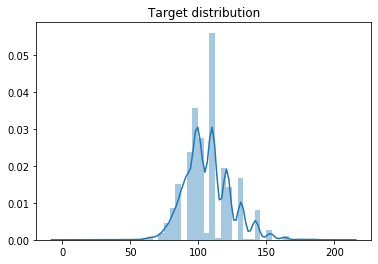

In [11]:
ML.Show_Targets_Dist()

It appears that there are some severe outliers... lets try reloading targets and just cut off the top 1% from either side of the distribution and see if that helps. Note: what we are doing here is acting upon the whole dataset before any train/test split, therefore it is reccomended that at this stage any global actions should be reasonable... in this case it seems reasonable to remove subjects with scores that are likely just human input error.

In [12]:
ML.Load_Targets(target_loc, 'nihtbx_picvocab_agecorrected', 'float', filter_outlier_percent=1)

Loading targets!
Loading /mnt/sdb2/ABCD2p0NDA/abcd_tbss01.txt assumed to be dataset type: basic
Filtering for outliers, dropping rows with params:  1
Min-Max Score (before outlier filtering): 0.0 208.0
Min-Max Score (post outlier filtering): 77.0 152.0
Final shape:  (11347, 1)

Total valid overlapping subjects = 9883



            targets
count  11347.000000
mean     106.438442
std       14.931205
min       77.000000
25%       98.000000
50%      105.000000
75%      118.000000
max      152.000000

Num. of unique vals: 34


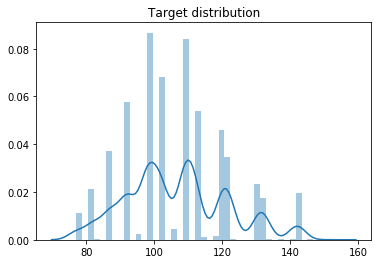

In [13]:
ML.Show_Targets_Dist()

One percent might even be too much...

In [14]:
ML.Load_Targets(target_loc, 'nihtbx_picvocab_agecorrected', 'float', filter_outlier_percent=.005)

Loading targets!
Loading /mnt/sdb2/ABCD2p0NDA/abcd_tbss01.txt assumed to be dataset type: basic
Filtering for outliers, dropping rows with params:  0.005
Min-Max Score (before outlier filtering): 0.0 208.0
Min-Max Score (post outlier filtering): 71.0 155.0
Final shape:  (11569, 1)

Total valid overlapping subjects = 10076



            targets
count  11569.000000
mean     106.701876
std       15.892801
min       71.000000
25%       98.000000
50%      106.000000
75%      120.000000
max      155.000000

Num. of unique vals: 38


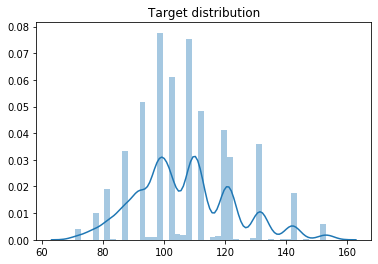

In [15]:
ML.Show_Targets_Dist()

That looks a little better, so only the really severe outliers are removed. The distribution is still a bit weird, but nothing we can do about that.

We have now loaded:
-Exclusions
-Data, Targets and Covars

We could optionally load stratification values, but for this example, we will just use random cross validation.

# Validation Phase

Before defining the train test split, we would optionally define a validation strategy, but for this expiriment we are just going to use random splits.

In [16]:
ML.Train_Test_Split(test_size=.25, random_state=1)

Final data for modeling loaded shape: (10076, 94)
Performed train/test split, train size: 7557 test size:  2519


# Modeling Phase

In [17]:
ML.Set_Default_ML_Params(problem_type='regression',
                         metric=['r2', 'mse'],
                         data_scaler='standard',
                         n_splits=3,
                         n_repeats=2,
                         int_cv=3,
                         n_jobs=8,
                         n_iter=20,
                         random_state=1)

No default feat selector passed, set to None
No default search type passed, set to None
No default data scaler param ind passed, set to 0
No default feat selector param ind passed, set to 0
No default extra params passed, set to empty dict
Default params set.



So what the above statements are telling us is that we are not using and feature selectors, and then that our default search type is set to None, which means we are by default not doing any sort of search for hyperparameters. In general the way a search for hyperparameters works, is that you can set a param ind, for data scaler, feat_selector and model_type, where the param ind specifies what grid of parameters you want to search over for that object. By default, each object (feat_selector, model type, data_scaler) has a base grid of parameters consisting of just 1 value, and that is always index 0. So when we set the search type to None, it actually forces every data_scaler_param_ind and model_type_param_ind to be 0. Are other options are to select search type ='s either 'grid' for an explicit grid search over all param options, or 'random', to search over whatever our value for n_iter number of parameters. Then, you can set any of the param inds to either a different numerical index, specifying a different distribution of params, or each param distribution also has a str indicator name which can be passed.

The extra complexity of all of this is worth it I promise, as it lets you define a random search of parameters over not just your model, but optionally a data scaler and feature selector, all relatively easily!

Oh but your asking, how do we see these different param ind options for each model or scaler?
Heck, I'll show ya

In [18]:
# First lets look at just which models are avaliable
ML.Show_Models(problem_type='regression', show_param_ind_options=False)

Note: Param distributions with a Rand Distribution
cannot be used in search_type = "grid"

Problem Type: regression
----------------------------------------

Avaliable models: 

- - - - - - - - - - - - - - - - - - - - 
DecisionTreeRegressor ("dt regressor")
- - - - - - - - - - - - - - - - - - - - 



- - - - - - - - - - - - - - - - - - - - 
ElasticNet ("elastic net regressor")
- - - - - - - - - - - - - - - - - - - - 



- - - - - - - - - - - - - - - - - - - - 
GaussianProcessRegressor ("gp regressor")
- - - - - - - - - - - - - - - - - - - - 



- - - - - - - - - - - - - - - - - - - - 
KNeighborsRegressor ("knn regressor")
- - - - - - - - - - - - - - - - - - - - 



- - - - - - - - - - - - - - - - - - - - 
LGBMRegressor ("light gbm regressor")
- - - - - - - - - - - - - - - - - - - - 



- - - - - - - - - - - - - - - - - - - - 
EarlyStopLGBMRegressor ("light gbm regressor early stop")
- - - - - - - - - - - - - - - - - - - - 



- - - - - - - - - - - - - - - - - - - - 
LinearRegression ("

Okay now lets choose to look at just the "svm regressor"

In [19]:
ML.Show_Models(model_type="svm regressor")

Note: Param distributions with a Rand Distribution
cannot be used in search_type = "grid"

- - - - - - - - - - - - - - - - - - - - 
SVR ("svm regressor")
- - - - - - - - - - - - - - - - - - - - 


Param Indices
-------------

0:

"base svm"
kernel: rbf
gamma: scale


1:

"svm rs"
kernel: rbf
gamma: Uniform/Reciprocal Distribution Over (1e-06, 0.1)
C: Uniform/Reciprocal Distribution Over (0.0001, 10000.0)

-------------



So, for the SVR it looks like we just have one other option besides 0, which is a random search option.

We can also check for the standard data scaler

In [20]:
ML.Show_Data_Scalers(data_scaler='standard')

Visit: 
https://scikit-learn.org/stable/modules/preprocessing.html
For more detailed information on different scalers / preprocessing.

- - - - - - - - - - - - - - - - - - - - 
StandardScaler ("standard")
- - - - - - - - - - - - - - - - - - - - 


Param Indices
-------------

0:

"base standard"
with_mean: True
with_std: True

-------------



Well no options for that, and we are not using any feature selection, so lets just use param_ind = 1 for the svm regressor

In [21]:
raw_scores = ML.Evaluate(model_type = 'svm',
                         model_type_param_ind = 1)

Running Evaluate with:
model_type = svm
problem_type = regression
metric = ['r2', 'mse']
data_scaler = standard
feat_selector = None
n_splits = 3
n_repeats = 2
int_cv = 3
search_type = None
model_type_param_ind = 1
data_scaler_param_ind = 0
feat_selector_param_ind = 0
n_jobs = 8
n_iter = 20
random_state = 1
extra_params = {}


Metric:  r2
Mean score:  0.049610702000910514
Macro std in score:  7.91338589407227e-05
Micro std in score:  0.007117263487304466

Metric:  mean squared error
Mean score:  -238.0951037724008
Macro std in score:  0.07898830131858858
Micro std in score:  8.303676552202848



Notably, we did not actually run a random parameter search for SVM, since our search_type is still set to None.

In [22]:
raw_scores = ML.Evaluate(model_type = 'svm',
                         search_type = 'random',
                         model_type_param_ind = 1)

Running Evaluate with:
model_type = svm
problem_type = regression
metric = ['r2', 'mse']
data_scaler = standard
feat_selector = None
n_splits = 3
n_repeats = 2
int_cv = 3
search_type = random
model_type_param_ind = 1
data_scaler_param_ind = 0
feat_selector_param_ind = 0
n_jobs = 8
n_iter = 20
random_state = 1
extra_params = {}


Metric:  r2
Mean score:  0.03871323176278211
Macro std in score:  0.002002795276814462
Micro std in score:  0.005348802647130417

Metric:  mean squared error
Mean score:  -240.7775804826369
Macro std in score:  0.3877904674964725
Micro std in score:  6.8401933488856175



Okay, lets say we wanted to use an elastic net now.

In [23]:
raw_scores = ML.Evaluate(model_type = 'elastic',
                         search_type= 'random',
                         model_type_param_ind = 1)

Running Evaluate with:
model_type = elastic
problem_type = regression
metric = ['r2', 'mse']
data_scaler = standard
feat_selector = None
n_splits = 3
n_repeats = 2
int_cv = 3
search_type = random
model_type_param_ind = 1
data_scaler_param_ind = 0
feat_selector_param_ind = 0
n_jobs = 8
n_iter = 20
random_state = 1
extra_params = {}


Metric:  r2
Mean score:  0.0342800711729002
Macro std in score:  0.0009886931554644422
Micro std in score:  0.0020895519098320893

Metric:  mean squared error
Mean score:  -241.8948234456348
Macro std in score:  0.14264293125316385
Micro std in score:  7.014567334442634



In [24]:
raw_scores = ML.Evaluate(model_type = 'elastic',
                         search_type= 'random',
                         model_type_param_ind = 1,
                         n_iter = 100)

Running Evaluate with:
model_type = elastic
problem_type = regression
metric = ['r2', 'mse']
data_scaler = standard
feat_selector = None
n_splits = 3
n_repeats = 2
int_cv = 3
search_type = random
model_type_param_ind = 1
data_scaler_param_ind = 0
feat_selector_param_ind = 0
n_jobs = 8
n_iter = 100
random_state = 2
extra_params = {}


Metric:  r2
Mean score:  0.037368254102185104
Macro std in score:  0.0018520276643054778
Micro std in score:  0.005311477695748682

Metric:  mean squared error
Mean score:  -241.08959103690393
Macro std in score:  0.38714053629429657
Micro std in score:  6.298621366673924



What about light gbm you say? That sounds fancy. (For both elastic net and this we just use model_type_param_ind = 1, since it is typically the random search grid of parameters, but definetly look to make sure what you are actuall running).

In [31]:
raw_scores = ML.Evaluate(model_type = ['light gbm', 'elastic'],
                         search_type='grid',
                         model_type_param_ind = [0, 0])

Running Evaluate with:
model_type = ['light gbm', 'elastic']
problem_type = regression
metric = ['r2', 'mse']
data_scaler = standard
feat_selector = None
n_splits = 3
n_repeats = 2
int_cv = 3
search_type = grid
model_type_param_ind = [0, 0]
data_scaler_param_ind = 0
feat_selector_param_ind = 0
n_jobs = 8
n_iter = 20
random_state = 1
extra_params = {}


Metric:  r2
Mean score:  0.037177776570477494
Macro std in score:  0.0012430621915798037
Micro std in score:  0.002660353067131821

Metric:  mean squared error
Mean score:  -241.18291843234738
Macro std in score:  0.39700693372444107
Micro std in score:  7.458651930435798



In [81]:
from deslib.des.knora_e import KNORAE
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from deslib.static.stacked import StackedClassifier

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [86]:
X = np.ones((20,20))
y = np.ones((20))

y[10:] = 0
y[15:] = 2

knn1 = KNeighborsClassifier()


knn1.fit(X,y)


models = [knn1]

models[0].fit(X,y)
knorae = KNORAE(models)
knorae.fit(X,y)

KNORAE(DFP=False, DSEL_perc=0.5, IH_rate=0.3, k=7, knn_classifier='knn',
       pool_classifiers=[KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                              metric='minkowski',
                                              metric_params=None, n_jobs=None,
                                              n_neighbors=5, p=2,
                                              weights='uniform')],
       random_state=None, safe_k=None, with_IH=False)

In [91]:
knorae.pool_classifiers[0]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [92]:
KNORAE?

In [ ]:
knorae = StackedClassifier

NotFittedError: This KNeighborsRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [55]:
knorae.predict(X)

NotFittedError: This StackedClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.